In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

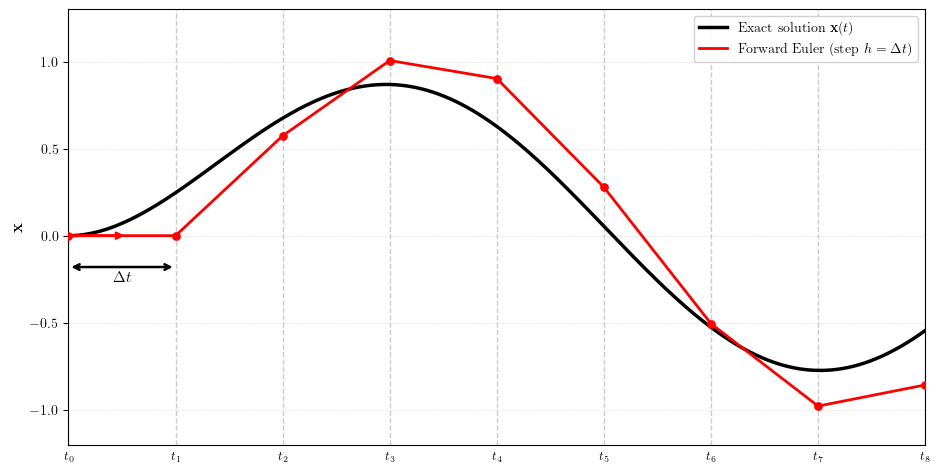

In [2]:
a = 0.8 
f = lambda x, t: -a*x + np.sin(t)

t0, x0 = 0.0, 0.0
h = 0.8 
n_steps = 8 

C = 1.0/(1.0 + a**2)
c1 = a/(1.0 + a**2)
c2 = -1.0/(1.0 + a**2)
def x_exact(t):
    return C*np.exp(-a*t) + c1*np.sin(t) + c2*np.cos(t)

t_euler = t0 + h*np.arange(n_steps + 1)
x_euler = np.zeros_like(t_euler)
x_euler[0] = x0
for k in range(n_steps):
    x_euler[k+1] = x_euler[k] + h * f(x_euler[k], t_euler[k])

t_fine = np.linspace(t0, t0 + h*n_steps, 800)
x_fine = x_exact(t_fine)

fig, ax = plt.subplots(figsize=(9.5, 4.8))

ax.plot(t_fine, x_fine, color="black", linewidth=2.5,
        label=r"Exact solution $\mathbf{x}(t)$")

ax.plot(t_euler, x_euler, color="red", linewidth=2,
        label=r"Forward Euler (step $h=\Delta t$)")
ax.scatter(t_euler, x_euler, s=28, color="red", zorder=3)

ymin, ymax = -1.2, 1.3
ax.set_ylim(ymin, ymax)
for i, ti in enumerate(t_euler):
    ax.axvline(ti, color="0.6", lw=1.0, ls="--", alpha=0.5, zorder=0)
    ax.text(ti, ymin - 0.1, rf"$t_{i}$", ha="center", va="bottom", fontsize=9)

s0 = f(x0, t0)
arrow_frac = 0.55
ax.annotate("",
            xy=(t0 + arrow_frac*h, x0 + arrow_frac*h*s0),
            xytext=(t0, x0),
            arrowprops=dict(arrowstyle="->", lw=2, color="red"))
# ax.text(t0 + arrow_frac*h, x0 + arrow_frac*h*s0 + 0.06,
#         r"$\mathbf{f}(\mathbf{x}(t_0), t_0)$",
#         color="red", fontsize=11)

y_dt = 0.18
ax.annotate("", xy=(h, -y_dt), xytext=(0.0, -y_dt),
            arrowprops=dict(arrowstyle="<->", lw=1.8, color="black"))
ax.text(0.5*h, -y_dt - 0.1, r"$\Delta t$", ha="center", va="bottom", fontsize=11)

ax.set_xlim(t0, t0 + h*n_steps)
# ax.set_xlabel(r"$t$", fontsize=12)
ax.set_ylabel(r"$\mathbf{x}$", fontsize=12)
ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.35)
ax.legend(loc="upper right", framealpha=0.9)
ax.set_xticks([])
fig.tight_layout()

plt.savefig('../../../figs/ode/forward_euler_demo.pdf')
plt.show()

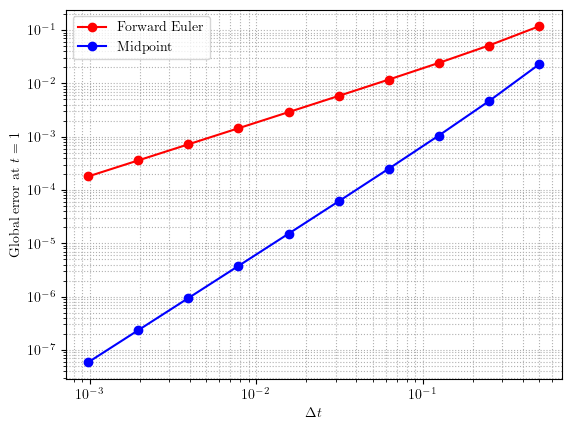

In [3]:
Ns = 2 ** np.arange(1, 11)
dts = 1.0 / Ns

def amp_euler(dt):
    return 1.0 - dt

def amp_midpoint(dt):
    return 1.0 - dt + 0.5 * dt * dt

y_exact_t1 = np.exp(-1.0)

err_euler = np.abs((amp_euler(dts) ** Ns) - y_exact_t1)
err_mid   = np.abs((amp_midpoint(dts) ** Ns) - y_exact_t1)

plt.figure()
plt.loglog(dts, err_euler, 'ro-', label='Forward Euler')
plt.loglog(dts, err_mid,   'bo-', label='Midpoint')
plt.xlabel(r'$\Delta t$')
plt.ylabel('Global error at $t=1$')
# plt.title('Global error vs. step size (log-log)')
plt.grid(True, which='both', ls=':')
plt.legend()
plt.savefig('../../../figs/ode/global_error_comparison.pdf')
plt.show()

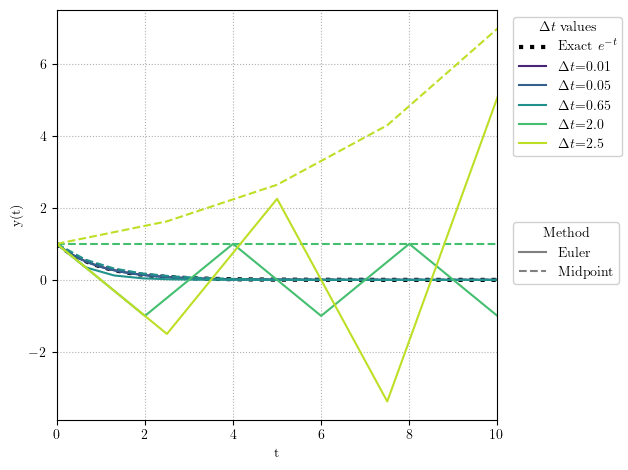

In [4]:
def euler_solve(dt, T):
    N = int(np.ceil(T / dt))
    t = np.arange(N + 1) * dt
    y = np.empty(N + 1)
    y[0] = 1.0
    r = amp_euler(dt)
    for n in range(N):
        y[n+1] = r * y[n]
    return t, y

def midpoint_solve(dt, T):
    N = int(np.ceil(T / dt))
    t = np.arange(N + 1) * dt
    y = np.empty(N + 1)
    y[0] = 1.0
    r = amp_midpoint(dt)
    for n in range(N):
        y[n+1] = r * y[n]
    return t, y

T = 10.0
dt_values = [0.01, 0.05, 0.65, 2.0, 2.5]

colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(dt_values)))

fig, ax = plt.subplots()
t_true = np.linspace(0, T, 1000)
ax.plot(t_true, np.exp(-t_true), linestyle=':', color='black', linewidth=3, label='Exact $e^{-t}$')

for i, dt in enumerate(dt_values):
    tE, yE = euler_solve(dt, T)
    tM, yM = midpoint_solve(dt, T)
    ax.plot(tE, yE, color=colors[i], linestyle='-', label=f'$\Delta t$={dt}')
    ax.plot(tM, yM, color=colors[i], linestyle='--')

ax.set_xlabel('t')
ax.set_ylabel('y(t)')
# ax.set_title('Stability comparison: Euler vs. Midpoint')
ax.grid(True, ls=':')

legend1 = ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), framealpha=0.9, title=r'$\Delta t$ values')

from matplotlib.lines import Line2D
method_handles = [
    Line2D([0], [0], color='gray', linestyle='-', label='Euler'),
    Line2D([0], [0], color='gray', linestyle='--', label='Midpoint')
]
ax.legend(handles=method_handles, loc='upper left', bbox_to_anchor=(1.02, 0.5), framealpha=0.9, title='Method')

ax.add_artist(legend1)
ax.set_xlim(0, 10)

fig.tight_layout()
plt.savefig('../../../figs/ode/stability_comparison.pdf')
plt.show()